
<img src="Capture1.png">



In [3]:
pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pip\\_internal\\build_env.py'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:


In [4]:
pip -v



Usage:   
  C:\ProgramData\Anaconda3\python.exe -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
 

<h1>Remarque:</h1>

Tout d'abord il faut installer <b>  la librairie OpenCV</b> pour traiter une image en temps réel et exécuter des opérations dessus.

<h1>OpenCV</h1>

OpenCV (pour Open Computer Vision) est une bibliothèque graphique libre, initialement développée par Intel, spécialisée dans le traitement d'images en temps réel.

La bibliothèque OpenCV met à disposition de nombreuses fonctionnalités très diversifiées permettant de créer des programmes en partant des données brutes pour aller jusqu'à la création d'interfaces graphiques basiques.



Elle propose la plupart des opérations classiques en traitement bas niveau des images :

-Lecture, écriture et affichage d’une image.

-Calcul de l'histogramme des niveaux de gris ou d'histogrammes couleurs .

-Lissage, filtrage .

-Seuillage d'image (méthode d'Otsu, seuillage adaptatif).

-Segmentation (composantes connexes, GrabCut) .

-Morphologie mathématique.

<h1> Segmentation d'image </h1>

La segmentation d'images est le processus de division d'images en segments en fonction de leurs caractéristiques de pixels. Cela nous aide à analyser et à comprendre les images de manière plus significative.

In [112]:
pip install opencv-contrib-python

In [54]:
#importation des bibliothèques
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.vq import kmeans, vq
import ipywidgets as widgets
from ipywidgets import interact








In [14]:
image = cv2.imread('la vie.jpg')
(h1, w1) = image.shape[:2]


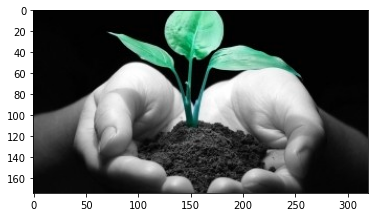

In [111]:
#Affichage de l'image
plt.imshow(image)

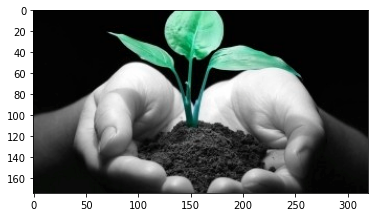

In [17]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('la vie1.jpg', quant)
plt.imshow(image)

cv2.imread('la vie.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

On va appliquer des bruits sur l'image originale:

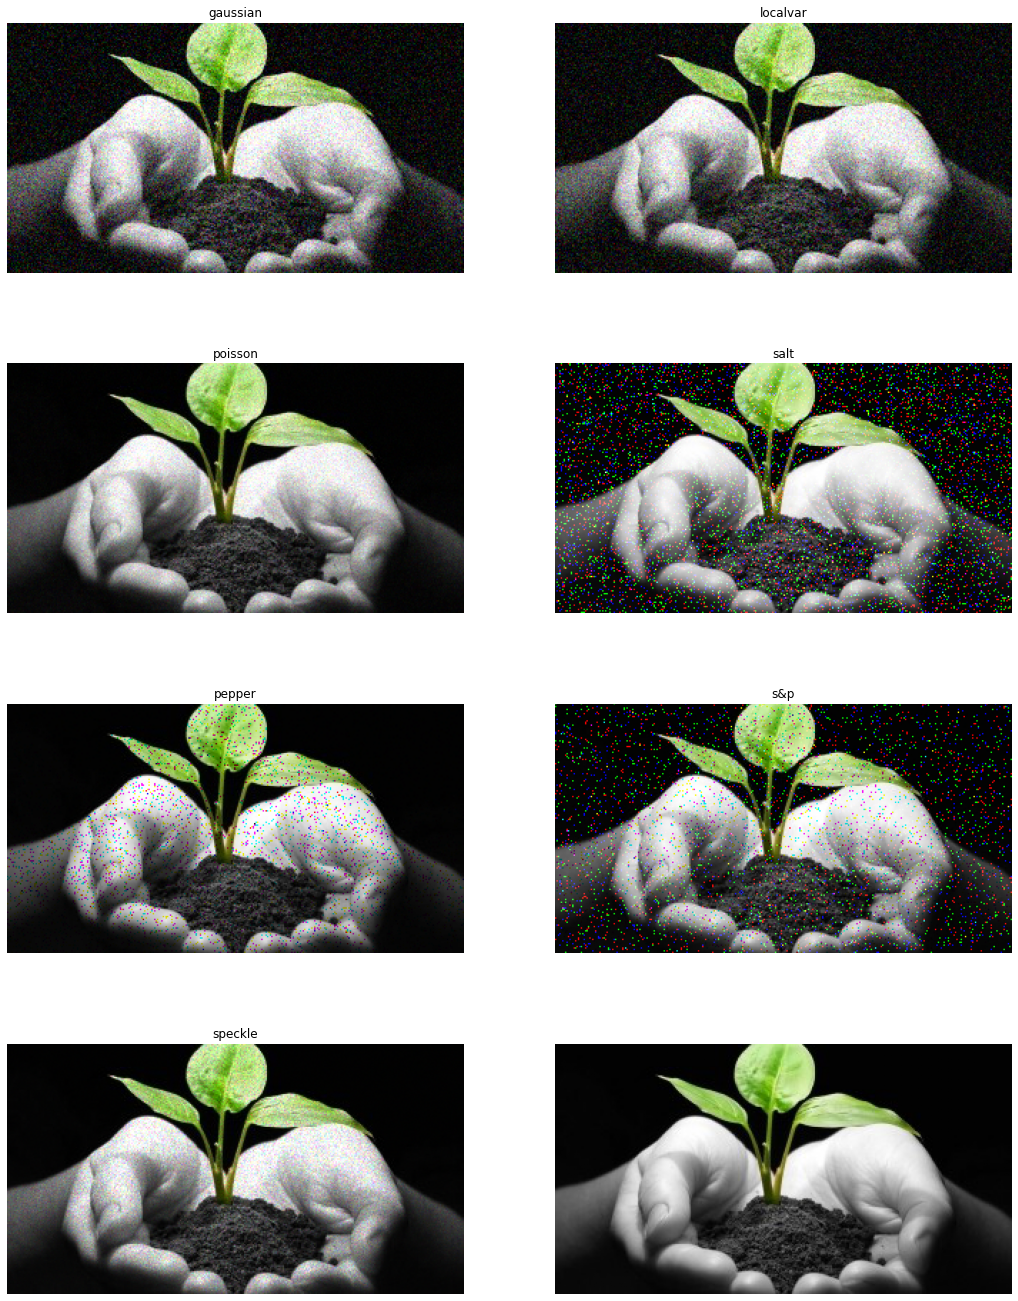

In [18]:
import skimage.io
import matplotlib.pyplot as plt
img_path="la vie.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

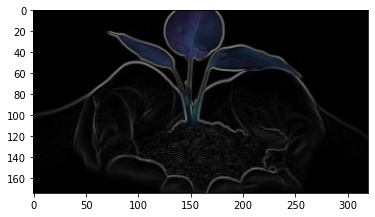

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline
from skimage import data,filters
image = img
plt.imshow(image)
#filtre sobel
edges = filters.sobel(image)
plt.imshow(edges)

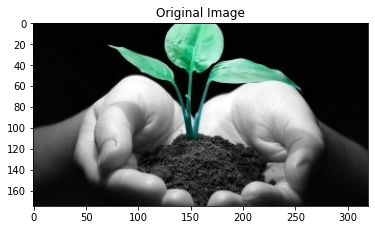

In [100]:
# Loading image
image = cv2.imread('la vie.jpg')

plt.title("Original Image")
plt.imshow(image)

In [101]:

r = []
g = []
b = []
 
for row in image:
    for pixel in row:
        # A pixel contains RGB values
        r.append(pixel[0])
        g.append(pixel[1])
        b.append(pixel[2])
 
df = pd.DataFrame({'red':r, 'green':g, 'blue':b})

<h1> L'algorithme KMeans </h1>

C’est l’un des algorithmes de clustering les plus répandus. 

Le clustering ou algorithme des k moyennes a pour but de regrouper des populations en communautés disposant de critères communs proches, jusqu'à avoir des communautés homogènes qu'on appellera cluster et qui ont pour représentant un centroïde.

Pour déterminer ces clusters, on regroupera les différents éléments en fonction d'une distance. Cette notion de distance est différente en fonction des domaines d'applications.

Le clustering par k-means peut être utilisé pour faire de la segmentation de clientèle, du clustering en Data Mining ou encore sur des images.

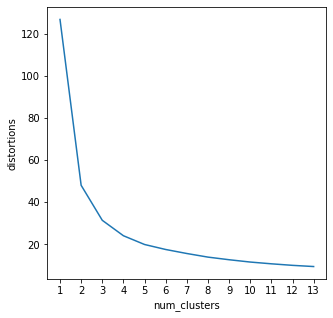

In [113]:
distortions = []
num_clusters = range(1, 14)
 
#Créer une liste de distorsions à partir de la fonction kmeans
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['red','green','blue']].values.astype(float), i)
    distortions.append(distortion)
 
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
 
# Créer un tracé linéaire de n_clusters et de distorsions
plt.figure(num = 4, figsize=(5,5))
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)

plt.xticks(num_clusters)
plt.show()

In [103]:

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

In [104]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)


In [105]:
def CulsterImg(k):
    # number of clusters (K)
    #k = 5
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

In [106]:
def plotSegmentedImage(k):
    K_N = CulsterImg(k)
    # show the image
    plt.figure(num = 5, figsize=(5,5))

    #plt.subplot(2,2,1)
    #plt.title('Original Image')
    plt.imshow(image)

    #plt.subplot(2,2,2)
    plt.title('Image Clustered with k = {}'.format(k))
    plt.imshow(K_N)

    plt.show()

In [110]:

int_slider = widgets.IntSlider(value=2, min=2, max=15, step=1, description='Choisir le nombre de cluster')
interact(plotSegmentedImage, k=int_slider)

interactive(children=(IntSlider(value=2, description='Choisir le nombre de cluster', max=15, min=2), Output())…

<function __main__.plotSegmentedImage(k)>

<h1> Remarque : </h1>   On remarque que lorsqu'on augmente la valeur K: nombre de cluster, l'image devient plus et plus clair 